# Trying Tensorflow and learning Neural Network

Nonlinear Regression Model Into using Tensorflow

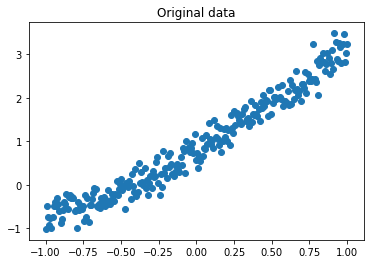

In [6]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
%matplotlib inline


trainsamples = 200
testsamples = 60

def model(X, hidden_weights1, hidden_bias1, ow):
    hidden_layer =  tf.nn.sigmoid(tf.matmul(X, hidden_weights1)+ b) 
    return tf.matmul(hidden_layer, ow)

dsX = np.linspace(-1, 1, trainsamples + testsamples).transpose()
dsY = 0.4* pow(dsX,2) +2 * dsX + np.random.randn(*dsX.shape) * 0.22 + 0.8

plt.figure()
plt.title('Original data')
plt.scatter(dsX,dsY)

In [7]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

hw1 = tf.Variable(tf.random_normal([1, 10], stddev=0.01))
ow = tf.Variable(tf.random_normal([10, 1], stddev=0.01))
b = tf.Variable(tf.random_normal([10], stddev=0.01))

model_y = model(X, hw1, b, ow)
cost = tf.pow(model_y-Y, 2)/(2)
train_op = tf.train.AdamOptimizer(0.0001).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    for i in range(1,10):
        trainX, trainY =dsX[0:trainsamples], dsY[0:trainsamples]
        for x1,y1 in zip (trainX, trainY):
            sess.run(train_op, feed_dict={X: [[x1]], Y: y1})
        testX, testY = dsX[trainsamples:trainsamples + testsamples], dsY[0:trainsamples:trainsamples+testsamples]
        cost1=0.
        for x1,y1 in zip (testX, testY):
            cost1 += sess.run(cost, feed_dict={X: [[x1]], Y: y1}) / testsamples       
            print( " Average cost for epoch " + str (i) + ":" + str(cost1))
        dsX, dsY = shuffle (dsX, dsY)

 Average cost for epoch 1:[[0.00953686]]
 Average cost for epoch 2:[[0.00149874]]
 Average cost for epoch 3:[[0.01388423]]
 Average cost for epoch 4:[[0.03209634]]
 Average cost for epoch 5:[[0.00311522]]
 Average cost for epoch 6:[[0.00332441]]
 Average cost for epoch 7:[[0.00724866]]
 Average cost for epoch 8:[[0.01447656]]
 Average cost for epoch 9:[[0.00599168]]


Fuel Efficiency Demo

Using TensorFlow backend.


<Figure size 432x288 with 0 Axes>

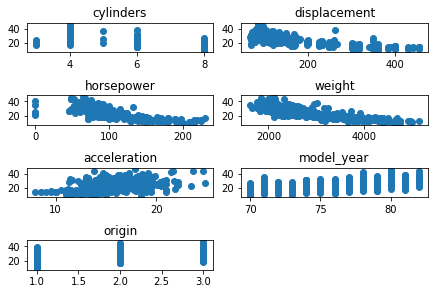

In [14]:
# coding: utf-8
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.contrib import learn
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

#A brief overlook of the data
df = pd.read_csv("mpg.csv", header=0)
df['displacement']=df['displacement'].astype(float)
X = df[df.columns[1:8]]
y = df['mpg']

plt.figure()
f, ax1 = plt.subplots()
for i in range (1,8):
    number = 420 + i
    ax1.locator_params(nbins=3)
    ax1 = plt.subplot(number)
    plt.title(list(df)[i])
    ax1.scatter(df[df.columns[i]],y)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [16]:
#Train and validate the model using 2 layes in between
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)

model = Sequential()
model.add(Dense(10, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, nb_epoch=1000, validation_split=0.33, shuffle=True,verbose=2 )

score = metrics.mean_squared_error(model.predict(scaler.transform(X_test)),y_test)
print(" Total Mean Squared Error: " + str(score))

C:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\anaconda\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Instructions for updating:
Use tf.cast instead.
Train on 199 samples, validate on 99 samples
Epoch 1/1000
 - 1s - loss: 609.0731 - val_loss: 560.2320
Epoch 2/1000
 - 0s - loss: 608.7192 - val_loss: 559.8817
Epoch 3/1000
 - 0s - loss: 608.3482 - val_loss: 559.5095
Epoch 4/1000
 - 0s - loss: 607.9497 - val_loss: 559.1119
Epoch 5/1000
 - 0s - loss: 607.5095 - val_loss: 558.6752
Epoch 6/1000
 - 0s - loss: 607.0335 - val_loss: 558.1919
Epoch 7/1000
 - 0s - loss: 606.5006 - val_loss: 557.6499
Epoch 8/1000
 - 0s - loss: 605.8998 - val_loss: 557.0344
Epoch 9/1000
 - 0s - loss: 605.1913 - val_loss: 556.3365
Epoch 10/1000
 - 0s - loss: 604.3822 - val_loss: 555.5082
Epoch 11/1000
 - 0s - loss: 603.4404 - val_loss: 554.5430
Epoch 12/1000
 - 0s - loss: 602.3343 - val_loss: 553.4541
Epoch 13/1000
 - 0s - loss: 601.0944 - val_loss: 552.1777
Epoch 14/1000
 - 0s - loss: 599.6197 - val_loss: 550.7281
Epoch 15/1000
 - 0s - loss: 597.9070 - val_loss: 549.0558
Epoch 16/1000
 - 0s - loss: 595.9975 - val_los

Epoch 140/1000
 - 0s - loss: 37.8713 - val_loss: 36.6138
Epoch 141/1000
 - 0s - loss: 37.5120 - val_loss: 36.2677
Epoch 142/1000
 - 0s - loss: 37.1723 - val_loss: 35.9186
Epoch 143/1000
 - 0s - loss: 36.8362 - val_loss: 35.5976
Epoch 144/1000
 - 0s - loss: 36.4974 - val_loss: 35.2923
Epoch 145/1000
 - 0s - loss: 36.1579 - val_loss: 34.9804
Epoch 146/1000
 - 0s - loss: 35.7997 - val_loss: 34.6231
Epoch 147/1000
 - 0s - loss: 35.4600 - val_loss: 34.2613
Epoch 148/1000
 - 0s - loss: 35.1276 - val_loss: 33.9310
Epoch 149/1000
 - 0s - loss: 34.8043 - val_loss: 33.6589
Epoch 150/1000
 - 0s - loss: 34.4616 - val_loss: 33.3397
Epoch 151/1000
 - 0s - loss: 34.1408 - val_loss: 33.0353
Epoch 152/1000
 - 0s - loss: 33.8389 - val_loss: 32.6983
Epoch 153/1000
 - 0s - loss: 33.5339 - val_loss: 32.4470
Epoch 154/1000
 - 0s - loss: 33.2391 - val_loss: 32.1662
Epoch 155/1000
 - 0s - loss: 32.9379 - val_loss: 31.8394
Epoch 156/1000
 - 0s - loss: 32.6100 - val_loss: 31.5604
Epoch 157/1000
 - 0s - loss: 32

Epoch 284/1000
 - 0s - loss: 13.4659 - val_loss: 12.6798
Epoch 285/1000
 - 0s - loss: 13.4000 - val_loss: 12.6256
Epoch 286/1000
 - 0s - loss: 13.3488 - val_loss: 12.5664
Epoch 287/1000
 - 0s - loss: 13.2981 - val_loss: 12.5303
Epoch 288/1000
 - 0s - loss: 13.2411 - val_loss: 12.4737
Epoch 289/1000
 - 0s - loss: 13.1877 - val_loss: 12.4201
Epoch 290/1000
 - 0s - loss: 13.1282 - val_loss: 12.3807
Epoch 291/1000
 - 0s - loss: 13.0718 - val_loss: 12.3320
Epoch 292/1000
 - 0s - loss: 13.0232 - val_loss: 12.2600
Epoch 293/1000
 - 0s - loss: 12.9668 - val_loss: 12.2183
Epoch 294/1000
 - 0s - loss: 12.9225 - val_loss: 12.1786
Epoch 295/1000
 - 0s - loss: 12.8758 - val_loss: 12.1210
Epoch 296/1000
 - 0s - loss: 12.8258 - val_loss: 12.0923
Epoch 297/1000
 - 0s - loss: 12.7825 - val_loss: 12.0694
Epoch 298/1000
 - 0s - loss: 12.7270 - val_loss: 12.0170
Epoch 299/1000
 - 0s - loss: 12.6736 - val_loss: 11.9587
Epoch 300/1000
 - 0s - loss: 12.6238 - val_loss: 11.9138
Epoch 301/1000
 - 0s - loss: 12

Epoch 430/1000
 - 0s - loss: 9.1458 - val_loss: 9.5755
Epoch 431/1000
 - 0s - loss: 9.1502 - val_loss: 9.5676
Epoch 432/1000
 - 0s - loss: 9.1182 - val_loss: 9.5150
Epoch 433/1000
 - 0s - loss: 9.1059 - val_loss: 9.4122
Epoch 434/1000
 - 0s - loss: 9.1388 - val_loss: 9.3251
Epoch 435/1000
 - 0s - loss: 9.1016 - val_loss: 9.3452
Epoch 436/1000
 - 0s - loss: 9.0848 - val_loss: 9.3443
Epoch 437/1000
 - 0s - loss: 9.0816 - val_loss: 9.4338
Epoch 438/1000
 - 0s - loss: 9.0612 - val_loss: 9.5038
Epoch 439/1000
 - 0s - loss: 9.0609 - val_loss: 9.4995
Epoch 440/1000
 - 0s - loss: 9.0438 - val_loss: 9.4102
Epoch 441/1000
 - 0s - loss: 9.0390 - val_loss: 9.3687
Epoch 442/1000
 - 0s - loss: 9.0239 - val_loss: 9.3478
Epoch 443/1000
 - 0s - loss: 9.0270 - val_loss: 9.2683
Epoch 444/1000
 - 0s - loss: 9.0179 - val_loss: 9.2461
Epoch 445/1000
 - 0s - loss: 9.0073 - val_loss: 9.2770
Epoch 446/1000
 - 0s - loss: 8.9831 - val_loss: 9.3059
Epoch 447/1000
 - 0s - loss: 8.9679 - val_loss: 9.3957
Epoch 448/

Epoch 579/1000
 - 0s - loss: 8.4356 - val_loss: 9.2048
Epoch 580/1000
 - 0s - loss: 8.4338 - val_loss: 9.2041
Epoch 581/1000
 - 0s - loss: 8.4333 - val_loss: 9.1518
Epoch 582/1000
 - 0s - loss: 8.4474 - val_loss: 9.0715
Epoch 583/1000
 - 0s - loss: 8.4342 - val_loss: 9.0586
Epoch 584/1000
 - 0s - loss: 8.4392 - val_loss: 9.0557
Epoch 585/1000
 - 0s - loss: 8.4358 - val_loss: 9.1156
Epoch 586/1000
 - 0s - loss: 8.4435 - val_loss: 9.1906
Epoch 587/1000
 - 0s - loss: 8.4459 - val_loss: 9.2643
Epoch 588/1000
 - 0s - loss: 8.4486 - val_loss: 9.1613
Epoch 589/1000
 - 0s - loss: 8.4237 - val_loss: 9.1899
Epoch 590/1000
 - 0s - loss: 8.4160 - val_loss: 9.2299
Epoch 591/1000
 - 0s - loss: 8.4217 - val_loss: 9.2523
Epoch 592/1000
 - 0s - loss: 8.4230 - val_loss: 9.2646
Epoch 593/1000
 - 0s - loss: 8.4146 - val_loss: 9.3748
Epoch 594/1000
 - 0s - loss: 8.4225 - val_loss: 9.3771
Epoch 595/1000
 - 0s - loss: 8.4298 - val_loss: 9.3388
Epoch 596/1000
 - 0s - loss: 8.4247 - val_loss: 9.3481
Epoch 597/

Epoch 728/1000
 - 0s - loss: 8.3097 - val_loss: 9.4400
Epoch 729/1000
 - 0s - loss: 8.3094 - val_loss: 9.6665
Epoch 730/1000
 - 0s - loss: 8.3683 - val_loss: 9.7540
Epoch 731/1000
 - 0s - loss: 8.3594 - val_loss: 9.5875
Epoch 732/1000
 - 0s - loss: 8.3076 - val_loss: 9.4010
Epoch 733/1000
 - 0s - loss: 8.2603 - val_loss: 9.2657
Epoch 734/1000
 - 0s - loss: 8.2655 - val_loss: 9.1266
Epoch 735/1000
 - 0s - loss: 8.2809 - val_loss: 9.0198
Epoch 736/1000
 - 0s - loss: 8.2667 - val_loss: 9.0496
Epoch 737/1000
 - 0s - loss: 8.2542 - val_loss: 9.1571
Epoch 738/1000
 - 0s - loss: 8.2491 - val_loss: 9.1924
Epoch 739/1000
 - 0s - loss: 8.2552 - val_loss: 9.1888
Epoch 740/1000
 - 0s - loss: 8.2434 - val_loss: 9.1566
Epoch 741/1000
 - 0s - loss: 8.2484 - val_loss: 9.0909
Epoch 742/1000
 - 0s - loss: 8.2541 - val_loss: 9.1017
Epoch 743/1000
 - 0s - loss: 8.2559 - val_loss: 9.1447
Epoch 744/1000
 - 0s - loss: 8.2469 - val_loss: 9.1417
Epoch 745/1000
 - 0s - loss: 8.2378 - val_loss: 9.0641
Epoch 746/

Epoch 877/1000
 - 0s - loss: 8.1352 - val_loss: 9.0917
Epoch 878/1000
 - 0s - loss: 8.1180 - val_loss: 9.0581
Epoch 879/1000
 - 0s - loss: 8.1284 - val_loss: 8.9780
Epoch 880/1000
 - 0s - loss: 8.1256 - val_loss: 9.0790
Epoch 881/1000
 - 0s - loss: 8.1130 - val_loss: 9.0422
Epoch 882/1000
 - 0s - loss: 8.1086 - val_loss: 8.9886
Epoch 883/1000
 - 0s - loss: 8.1106 - val_loss: 8.9173
Epoch 884/1000
 - 0s - loss: 8.1438 - val_loss: 8.8663
Epoch 885/1000
 - 0s - loss: 8.0974 - val_loss: 9.0368
Epoch 886/1000
 - 0s - loss: 8.1111 - val_loss: 9.2428
Epoch 887/1000
 - 0s - loss: 8.1422 - val_loss: 9.2481
Epoch 888/1000
 - 0s - loss: 8.1441 - val_loss: 9.1815
Epoch 889/1000
 - 0s - loss: 8.1248 - val_loss: 9.1703
Epoch 890/1000
 - 0s - loss: 8.1224 - val_loss: 9.1309
Epoch 891/1000
 - 0s - loss: 8.1222 - val_loss: 9.1016
Epoch 892/1000
 - 0s - loss: 8.1187 - val_loss: 9.0142
Epoch 893/1000
 - 0s - loss: 8.1245 - val_loss: 9.0014
Epoch 894/1000
 - 0s - loss: 8.0988 - val_loss: 8.9212
Epoch 895/

C:\anaconda\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


Classification of wine

             Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoid.phenols     Proanth   Color.int  \
count  178.000000  178.000000            178.000000  178.000000  178.000000   
mean     2.295112    2.029270              0.361854    1.590899    5.058090   
std      0.625851    0.998859    

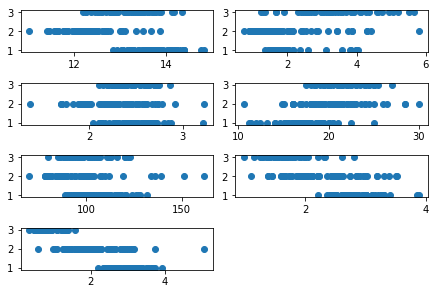

In [17]:
# coding: utf-8
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn import preprocessing
%matplotlib inline

df = pd.read_csv("wine.csv", header=0)
print (df.describe())

for i in range (1,8):
    number = 420 + i
    ax1 = plt.subplot(number)
    ax1.locator_params(nbins=3)
    plt.title
    ax1.scatter(df[df.columns[i]],df['Wine']) #Plot a scatter draw of the  datapoints
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [18]:
# We have accuracy of 90%+
sess = tf.InteractiveSession()

X = df[df.columns[1:13]].values
y = df['Wine'].values-1
Y = tf.one_hot(indices = y, depth=3, on_value = 1., off_value = 0., axis = 1 , name = "a").eval()
X, Y = shuffle (X, Y)

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

x = tf.placeholder(tf.float32, [None, 12])
W = tf.Variable(tf.zeros([12, 3]))
b = tf.Variable(tf.zeros([3]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32, [None, 3])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)


tf.initialize_all_variables().run()
for i in range(100):
  X,Y =shuffle (X, Y, random_state=1)

  Xtr=X[0:140,:]
  Ytr=Y[0:140,:]

  Xt=X[140:178,:]
  Yt=Y[140:178,:]
  Xtr, Ytr = shuffle (Xtr, Ytr, random_state=0)
  
  batch_xs, batch_ys = Xtr , Ytr
  train_step.run({x: batch_xs, y_: batch_ys})
  cost = sess.run (cross_entropy, feed_dict={x: batch_xs, y_: batch_ys})
  
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print(accuracy.eval({x: Xt, y_: Yt}))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.94736844
0.92105263
0.9736842
0.92105263
0.94736844
1.0
0.9736842
0.92105263
0.92105263
0.9736842
0.94736844
0.8684211
0.92105263
0.94736844
0.92105263
0.9736842
0.92105263
0.8947368
0.92105263
0.94736844
0.9736842
0.94736844
0.94736844
1.0
0.9736842
0.9736842
1.0
0.94736844
0.92105263
0.9736842
0.92105263
1.0
0.92105263
0.9736842
1.0
1.0
1.0
0.92105263
0.92105263
1.0
0.94736844
0.9736842
1.0
0.9736842
0.92105263
0.9736842
0.94736844
1.0
0.92105263
1.0
0.94736844
0.92105263
1.0
1.0
0.9736842
1.0
0.9736842
1.0
0.94736844
1.0
0.94736844
0.9736842
0.9736842
0.9736842
0.92105263
1.0
0.92105263
0.94736844
1.0
0.9736842
0.94736844
0.9736842
0.9736842
0.9736842
0.94736844
0.9736842
1.0
0.9736842
1.0
1.0
0.94736844
0.94736844
0.9736842
0.9736842
1.0
0.94736844
1.0
1.0
0.9736842
1.0
0.94736844
0.9736842
1.0
0.94736844
1.0
1.0
1.0
0.9736842
0.9736842
1.0
